In [2]:
import pandas as pd
import numpy as np 
from konlpy.tag import Komoran
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image



In [3]:



df = pd.read_excel('../data/야인시대 1부 (1~50) 통합대본.xlsx')
df2 = pd.read_excel('../data/야인시대 2부(51~124) 통합대본.xlsx')
df= pd.concat([df, df2], axis=0)
df = df[df["인물"].str.startswith("#") == False]
people=list(df["인물"].value_counts()[:50].index) # 대사가 많은 인물만 추리기 


# 두한, 청년두한, 소년두한
# 정진영, 청년진영 
# 개코, 소년개코 
# 해당 인물을 같은 라벨로 표시하기 : replace사용
replace_dict = {
    "청년두한": "두한",
    "소년두한": "두한",
    "청년진영": "정진영",
    "청년개코": "개코"
}

df["인물"] = df["인물"].replace(replace_dict)
df["인물"].value_counts()[:50]

df=df[df["인물"]=="이정재"].reset_index(drop=True)
df.to_csv('../data/야인시대.csv', index=False)
feature = df["대사"]


In [4]:
from konlpy.tag import Komoran
from collections import Counter

# 데이터 토큰화 및 단어 사전 구축 
def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens
    for token, count in counter.most_common(n_vocab):
        vocab.append(token)
    return counter


tokenizer = Komoran()
train_tokens = [tokenizer.morphs(review) for review in feature]

vocab = build_vocab(corpus=train_tokens, n_vocab=2000, special_tokens=["<pad>", "<unk>"])


In [5]:
vocab=dict(vocab.most_common())
vocab = {key: value for key, value in vocab.items() if len(key) >= 2}
stop_words = ["...", "습니다", "ㅂ니다", "그렇", "아니", "우리", "아서", "그래", "으로", "습니까", "라고", "어서", "지금", "에서", "어요", "ㄴ가", "아야", "어떻", "..", "무슨", "그것", "ㅂ니까", "이렇", "그리고", "다고", "그런", "는데", "정말", "여기", "까지", "이것", "모르", "어야", "구만", "이제", "얘기", "ㅂ시오", "ㄴ다", "니까", "지만", "에게", "어디", "오늘", "나라", "도록", "위하", "못하", "고맙", "그만", "다시", "누구", "하지만", "만나", "ㅂ시다", "라는", "말씀", "제가", "다는", "으면", "께서", "부터", "그럼", "너무", "아주", "다면", "마시", "들어가", "이런", "ㅂ쇼", "모두", "ㄴ데", "나오", "아직", "이나", "죽이", "이야", "한테", "드리", "지요", "아이", "아라", "으시", "이미", "많이", "아요", "하하", "필요", "가지", "그러", "이번", "때문", "처럼", "해보", "시키", "대로", "어쩌", "그래도", "아도", "ㄴ다고", "그냥", "아무튼", "보다", "너희", '절대', '바로', '자고', '다가', '이란', '았었', 'ㄴ다는', '다니', '없이', '이건',
    '만들', '면서', '다음', '으니까', '구나', 'ㄴ지', '먼저', '지마는', '다르', '바쁘',
    '아니야', '으니', '에요', '일단', '그러나', '거지', '아무래도', '근데', '려고', '도대체',
    'ㄹ까', '잖아', '라니', '조금', '하고', '부르', '헌데', '부르', '얼마', '라구',
    '그래요', '얼마나', '예요', '어라', '떠나', '하나', '으니', '보내', '물론', '거기',
    'ㄴ다면', '거든', '어야지', '그때', '같이', '지키', '자구','들어오', '여러', '취하', '사람', '언제', '자는', '기다리', '다녀오', '는가', '끝나',
    '계속', '라도', '이기', '당신', '라면', '시간', '이유', '할아버지', '계시', '나서',
    '사실', '밖에', '배우', '모든', '잠시', '이름', '자리', '지나', '지내', '요즘',
    '돌아오', '자리', '중요', '는지', '반드시', '그래서', 'ㄴ단', '분명', '돌아가', '어떤',
    '약속', '다행', '그런데']

# stop_words에 해당하지 않는 키값만 딕셔너리로 만들기 
vocab = {key: value for key, value in vocab.items() if key not in stop_words}
vocab

{'사돈': 133,
 '경찰': 80,
 '조직': 71,
 '사장': 68,
 '김두한': 63,
 '생각': 61,
 '자유당': 60,
 '고문': 56,
 '식구': 54,
 '친구': 52,
 '자네': 51,
 '이정재': 49,
 '형님': 47,
 '동대문': 44,
 '석재': 42,
 '영주': 36,
 '선거': 36,
 '주먹': 34,
 '소니': 33,
 '정치': 33,
 '하하하': 32,
 '나가': 32,
 '고생': 32,
 '의장': 32,
 '명동': 31,
 '오야': 30,
 '동진이': 29,
 '모양': 28,
 '버리': 27,
 '사건': 26,
 '이봐': 26,
 '장사': 24,
 '어차피': 24,
 '연락': 24,
 '준비': 23,
 '군요': 22,
 '어렵': 22,
 '아야지': 22,
 '부장': 21,
 '함께': 21,
 '마음': 21,
 '국회': 21,
 '세상': 20,
 '잘못': 20,
 '알아보': 19,
 '빨리': 19,
 '소리': 19,
 '내일': 19,
 '이천': 18,
 '대통령': 18,
 '쩝,': 18,
 '김동진': 18,
 '전화': 17,
 '처리': 17,
 '화수': 17,
 '친일파': 16,
 '건달': 16,
 '의리': 16,
 '문제': 16,
 '해결': 16,
 '아우': 16,
 '시작': 16,
 '정의': 16,
 '큰일': 16,
 '삼우': 16,
 '조사': 15,
 '구요': 15,
 '검찰': 15,
 '조용히': 15,
 '옛날': 15,
 '확실': 15,
 '권력': 15,
 '이영숙': 15,
 '이기붕': 15,
 '여러분': 15,
 '사단': 15,
 '일어나': 14,
 '다른': 14,
 '힘들': 14,
 '서로': 14,
 '신문': 14,
 '운명': 14,
 '배신': 14,
 '국회의원': 14,
 '정부': 14,
 '경무대': 14,
 '쓰읍,': 14,
 '세계': 14,
 '그동안': 13

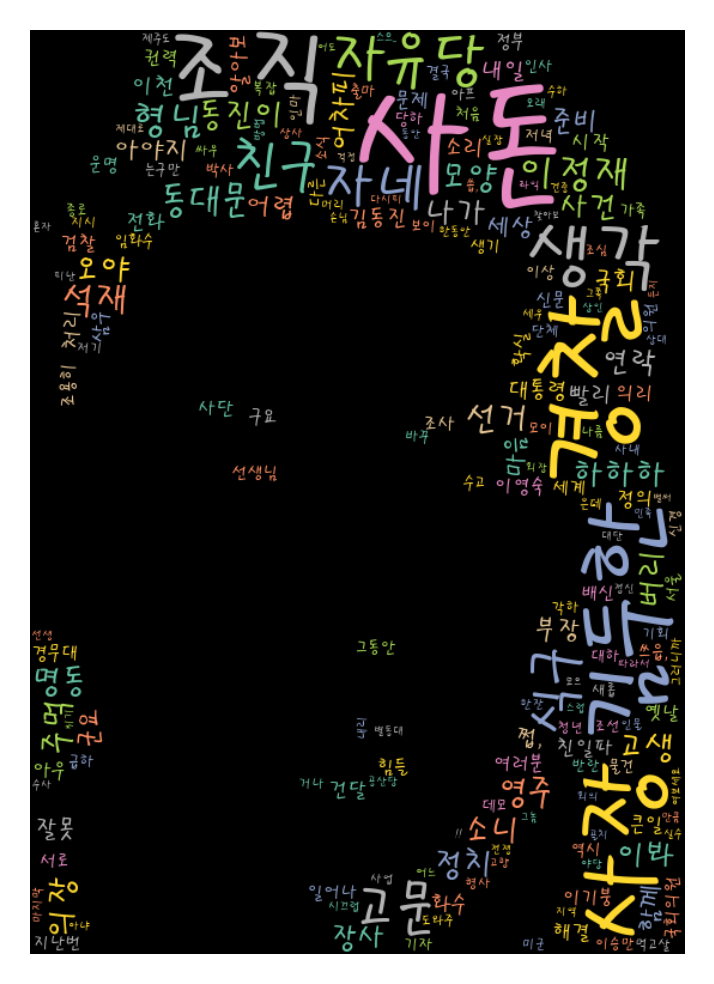

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 이미지 로드
image_mask = np.array(Image.open("jungjae2.png"))  # 이미지 경로를 적절히 변경하세요.

# 이미지를 워드클라우드에 적용
wordcloud = WordCloud(font_path=r'c:\Windows\Fonts\HMFMPYUN.TTF', background_color='black', colormap='Set2', mask=image_mask).generate_from_frequencies(vocab)

# 고화질로 렌더링
plt.figure(figsize=(8, 4), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


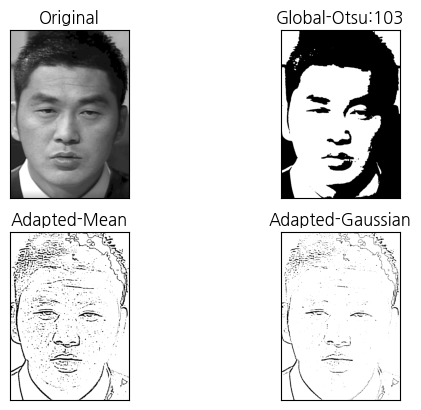

In [7]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('./jungjae.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imwrite('jungjae2.png', th1)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()
